# GPS

Sort through the raw GPS data 50ms at a time. Then look at `soft-correlator`'s output of doppler, code phase, and SNR.

This jumps right through the data gap at t+4.55 seconds

In [1]:
import json
import glob

files = glob.glob('./sats/*')
sats = {}
for i, fname in enumerate(sorted(files)):
    #print fname, "~~~~~~~~~~~~~~"
    with open(fname, 'r') as f_in:
        try:
            data = json.loads(f_in.read())
        except:
            continue
        for sat, cor in data.iteritems():
            if sat not in sats:
                sats[sat] = {'doppler': [0]*len(files), 'code': [0]*len(files), 'snr': [0]*len(files)}
            sats[sat]['doppler'][i] = cor['doppler']
            sats[sat]['code'][i] = cor['phase']
            sats[sat]['snr'][i] = cor['snr']

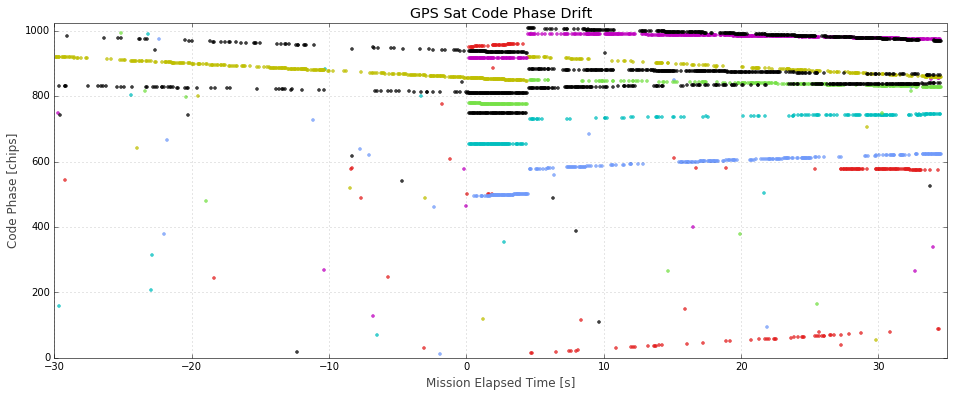

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

time = [(i*50e-3)-32.041913222 for i in range(len(files))]

fig, ax1 = plt.subplots(figsize=(16,6))
plt.title(r"GPS Sat Code Phase Drift")
plt.xlabel(r"Mission Elapsed Time [s]")
plt.ylabel(r"Code Phase [chips]")

for sat, cor in sats.iteritems():
    times = []
    codes = []
    for i, c in enumerate(cor['code']):
        if c > 0:
            times.append(time[i])
            codes.append(c)
    ax1.plot(times, codes, '.', alpha=0.75, label=sat)

ax1.set_xlim([-30,35])
ax1.set_ylim([0,1024])
#ax1.legend(loc=2)
plt.show()

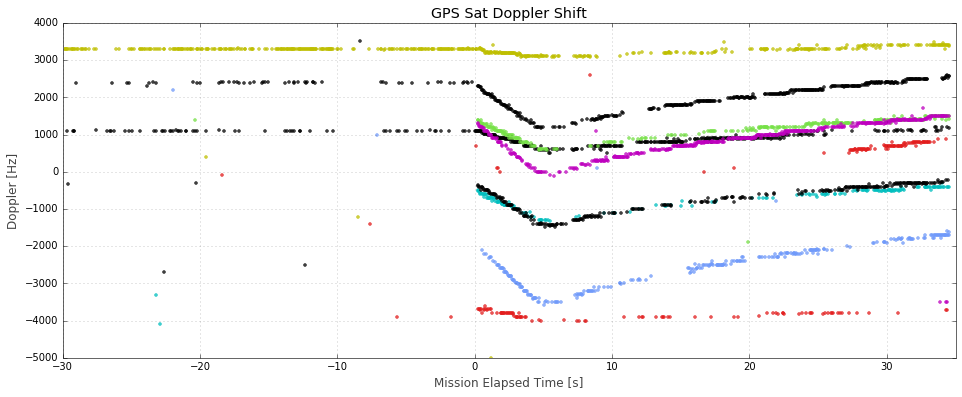

In [3]:
fig, ax1 = plt.subplots(figsize=(16,6))
plt.title(r"GPS Sat Doppler Shift")
plt.xlabel(r"Mission Elapsed Time [s]")
plt.ylabel(r"Doppler [Hz]")

for sat, cor in sats.iteritems():
    times = []
    dops = []
    for i, d in enumerate(cor['doppler']):
        if d != 0:
            times.append(time[i])
            dops.append(d)
    ax1.plot(times, dops, '.', alpha=0.75, label=sat)

ax1.set_xlim([-30,35])
ax1.set_ylim([-5000, 4000])
#ax1.legend(loc=2)
plt.show()

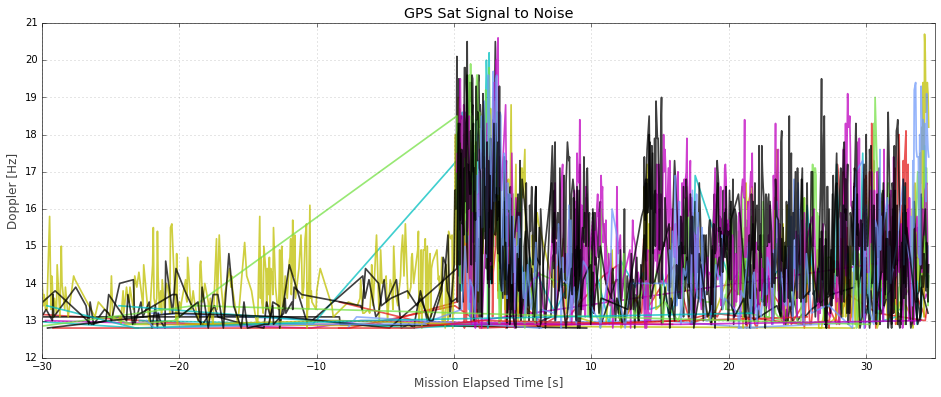

In [4]:
fig, ax1 = plt.subplots(figsize=(16,6))
plt.title(r"GPS Sat Signal to Noise")
plt.xlabel(r"Mission Elapsed Time [s]")
plt.ylabel(r"Doppler [Hz]")

for sat, cor in sats.iteritems():
    times = []
    snrs = []
    for i, s in enumerate(cor['snr']):
        if s != 0:
            times.append(time[i])
            snrs.append(s)
    ax1.plot(times, snrs, '-', alpha=0.75, label=sat)

ax1.set_xlim([-30,35])
#ax1.set_ylim([-6000, 6000])
#ax1.legend(loc=2)
plt.show()

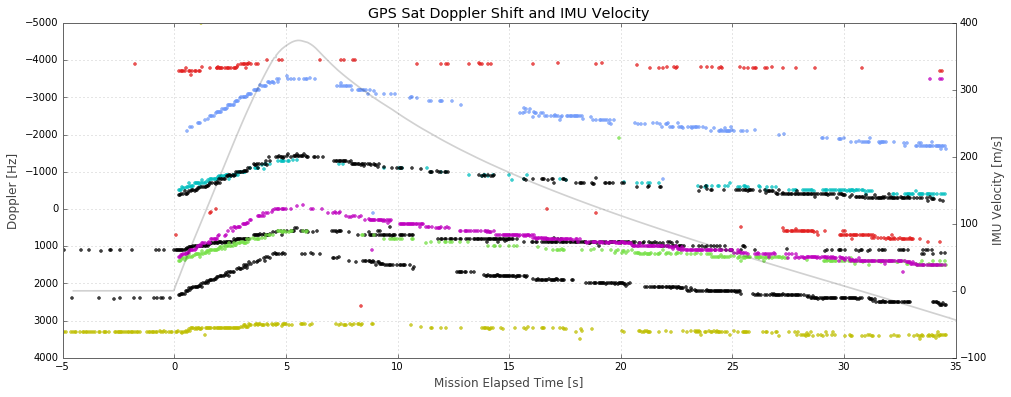

In [5]:
from numpy import loadtxt, array, subtract, divide, multiply

columns = loadtxt("../launch-overview/uncalibrated_integrated_velocity.csv", delimiter=',', unpack=True)
vel_time = columns[0]
imuvel   = columns[1]

fig, ax1 = plt.subplots(figsize=(16,6))
plt.title(r"GPS Sat Doppler Shift and IMU Velocity")
plt.xlabel(r"Mission Elapsed Time [s]")
plt.ylabel(r"Doppler [Hz]")

for sat, cor in sats.iteritems():
    times = []
    dops = []
    for i, d in enumerate(cor['doppler']):
        if d != 0:
            times.append(time[i])
            dops.append(d)
    ax1.plot(times, dops, '.', alpha=0.75, label=sat)

ax2 = ax1.twinx()
ax2.set_ylabel(r"IMU Velocity [m/s]")
ax2.plot(vel_time, imuvel, 'k-', alpha=0.18, label="IMU Velocity")
ax2.grid(b=False)
#ax2.set_ylim([-50,150])

ax1.set_xlim([-5,35])
ax2.set_xlim([-5,35])
ax1.set_ylim([4000, -5000])
#ax1.legend(loc=2)
plt.show()